# Cousera Capstone Project
- Codeset to accomplish the Cousera Capstone Project
- Work in progress and often some cells used to play with data as exploration 
## Methods
- Performed exploratory analysis on the major environmental variables
- Used logistic and K-nearest neighbors to attempt to model and classify the datasets

- Need to import all the libraries and sets of functions to the kernal

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn import preprocessing

print('Hello Capstone Project Course')

Hello Capstone Project Course


- Read in the data

In [69]:
df = pd.read_csv(r'C:\*\*\*\GitHub\Coursera_Capstone\Data-Collisions.csv',header =0)

In [70]:
# Find column names for those with less than 25% data coverage; can repeat for less than 95%
qn = pd.DataFrame((df.count()/len(df)) < .25)
# Print the column header names; actual percentage can be determined as needed
print(qn[qn[0]])

                   0
EXCEPTRSNDESC   True
INATTENTIONIND  True
PEDROWNOTGRNT   True
SPEEDING        True


<function matplotlib.pyplot.show(*args, **kw)>

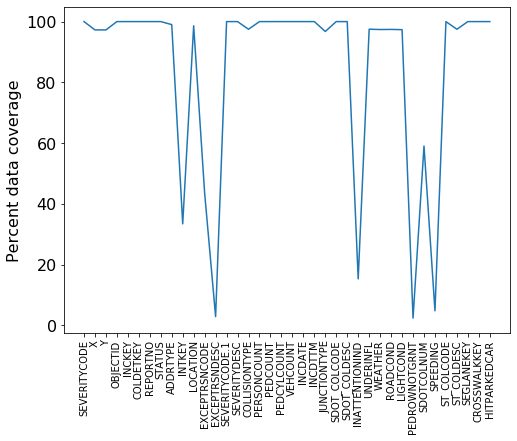

In [71]:
# Figure for percentage of data coverage for each column to see how much data coverage exists across all features
plt.figure(figsize=(8,6))
plt.plot(df.count()/len(df)*100)
plt.yticks(fontsize = 16)
plt.ylabel('Percent data coverage',fontsize = 16)
plt.xticks(rotation = 90)
plt.show

In [72]:
# List of columns being kept within the analysis and drop the other columns not being used; see report for the reasoning why certain columns were dropped
keep = pd.Series(['INCKEY', 'ADDRTYPE', 'SEVERITYCODE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'SDOT_COLCODE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'HITPARKEDCAR','INATTENTIONIND', 'SPEEDING', 'PEDROWNOTGRNT', 'INCDATE','INCDTTM','SEVERITYDESC'])
qqn = df.columns.isin(keep)
df= df.drop(df[df.columns[~qqn]],1)


In [73]:
# Fill in blanks in columns with N or Y to indicate yes or no based on the data already in the dataset
values = {'INATTENTIONIND': 'N', 'PEDROWNOTGRNT': 'N', 'SPEEDING': 'N', 'UNDERINFL':'Y'}
df.fillna(value=values, inplace=True)
# Drop labels that are not fully filled out with data across each row/label
df.dropna(inplace=True)
# Add multiple time columns to remove influence of month and year to the day of year and hour of day; need to convert to pandas datetime to do so
# Is meant to look at the diurnal and yearly cycle of accidents and if this is a contributing factor to accident severity 
df['dayofyear'] = pd.to_datetime(df['INCDATE']).dt.dayofyear
df['hour'] = pd.to_datetime(df['INCDTTM']).dt.hour

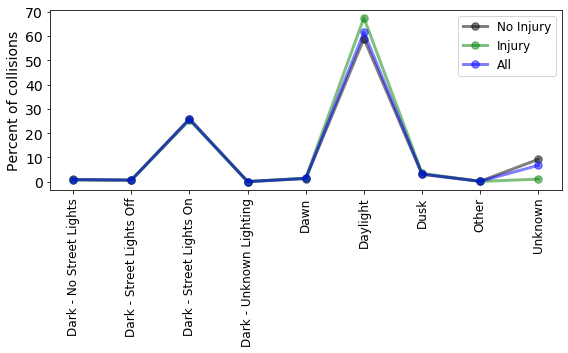

In [74]:
# Counts for different combinations of features to see how they compare in an intial comparison.
# Tested this with LIGHTCOND, WEATHERCOND, and ROADCONC to generate the plot below.
# The other variables kept within the dataset are not as continuous or are binary so this does not apply.
# Data is normalized by the total number of reports across the dataset for each of the unique column headers
gg = df.groupby([df['SEVERITYCODE'],'LIGHTCOND']).size().reset_index().rename(columns={0:'count'})
qn = gg['SEVERITYCODE']==1
xgg = gg.groupby('LIGHTCOND').sum().reset_index()
fig = plt.figure(2, figsize=(8,5))
plt.plot(gg['LIGHTCOND'][qn],gg['count'][qn]/sum(gg['count'][qn])*100,'.-k', linewidth = 3,ms= 15, alpha = 0.5, label = 'No Injury')
plt.plot(gg['LIGHTCOND'][~qn],gg['count'][~qn]/sum(gg['count'][~qn])*100,'.-g', linewidth = 3,ms= 15, alpha = 0.5, label = 'Injury')
plt.plot(xgg['LIGHTCOND'],xgg['count']/sum(xgg['count'])*100,'.-b', linewidth = 3,ms= 15, alpha = 0.5, label = 'All')
plt.xticks(rotation = 90, fontsize = 12); plt.yticks(fontsize = 14)
plt.ylabel('Percent of collisions', fontsize = 14)
plt.legend(fontsize = 12)
plt.tight_layout()

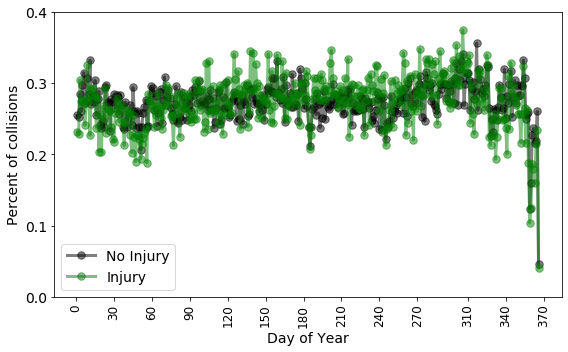

In [75]:
# Plot the data across the entire year as normalized by the total number of reports. This accounts for every year within the data set 
# Does not split out to individual years but is possible; each marker is for each day.
doy = df.groupby([df['SEVERITYCODE'],'dayofyear']).size().reset_index().rename(columns={0:'count'})
qn = doy['SEVERITYCODE']==1
fig = plt.figure(2, figsize=(8,5))
plt.plot(doy['dayofyear'][qn],doy['count'][qn]/sum(doy['count'][qn])*100,'.-k', linewidth = 3,ms= 15, alpha = 0.5, label = 'No Injury')
plt.plot(doy['dayofyear'][~qn],doy['count'][~qn]/sum(doy['count'][~qn])*100,'.-g', linewidth = 3,ms= 15, alpha = 0.5, label = 'Injury')
plt.xticks(rotation = 90, fontsize = 12); plt.yticks(fontsize = 14)
plt.ylabel('Percent of collisions', fontsize = 14)
plt.xlabel('Day of Year', fontsize = 14)
plt.xticks([0,30,60,90,120,150,180,210,240,270,310,340,370])
plt.yticks([0,0.1,0.2,0.3,0.4])
plt.legend(fontsize = 14)
plt.tight_layout()

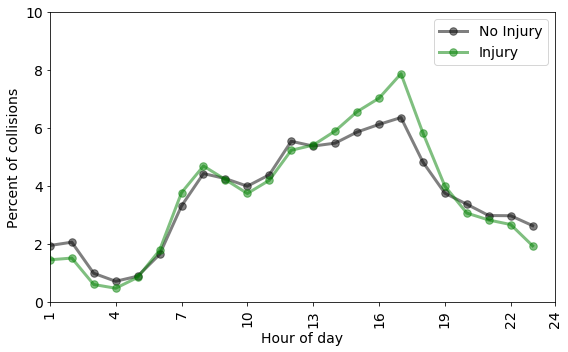

In [76]:
# PLot for the diurnal frequnecy of accidents across each hour. Midnight and unknown times are missing but the total amount of reports is used in the normalization
# Guessing the time code for 00:00-01:00 was lost in the data set but also likely timecodes without the hour:minute marked so can't differentiate between the two
doy = df.groupby([df['SEVERITYCODE'],'hour']).size().reset_index().rename(columns={0:'count'})
qn = doy['SEVERITYCODE']==1
fig = plt.figure(2, figsize=(8,5))
plt.plot(doy['hour'][qn],doy['count'][qn]/sum(doy['count'][qn])*100,'.-k', linewidth = 3,ms= 15, alpha = 0.5, label = 'No Injury')
plt.plot(doy['hour'][~qn],doy['count'][~qn]/sum(doy['count'][~qn])*100,'.-g', linewidth = 3,ms= 15, alpha = 0.5, label = 'Injury')
plt.xticks(rotation = 90, fontsize = 12); plt.yticks(fontsize = 14)
plt.ylabel('Percent of collisions', fontsize = 14)
plt.xlim([1,24]); plt.ylim([0,10])
plt.xticks([1,4,7,10,13,16,19,22,24], fontsize = 14)
plt.legend(fontsize = 14); plt.xlabel('Hour of day', fontsize = 14)
plt.tight_layout()

In [77]:
# Selecting the final columns for the machine learning analysis.
X = df[['INCKEY', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'SDOT_COLCODE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'HITPARKEDCAR','INATTENTIONIND', 'SPEEDING', 'PEDROWNOTGRNT', 'hour','dayofyear']]
#Convert severity code to 0 or 1 prior to classification
y = df['SEVERITYCODE']
qn = df['SEVERITYCODE']==2
y = np.multiply(qn, 1)
# Convert feature columns data to strings 
X[X.columns[X.dtypes=='object']]= X[X.columns[X.dtypes=='object']].astype(str)

In [78]:
# tranform all string and object dtypes into numerical values to be used in the analysis below; mix of numerical and object types so loop finds them and runs them through the preprocessing
for k in X.columns:
    if X[k].dtypes == 'object':
        AT = preprocessing.LabelEncoder()
        AT.fit(X[k].unique())
        X[k] = AT.transform(X[k])
X=X.values

# Create train/test split of the data using a test size of 0.3 of the whole dataset with the rest as the train set. Other options available but needs to be high enough to generate a good model
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [79]:
# Logistic regression model generation; the C value did not matter in the final work and the output below gives the results and the predict possibility
LRModel=LogisticRegression(C=0.01, solver='liblinear')
LRModel.fit(X_trainset,y_trainset)
predictions_diabetes=LRModel.predict(X_testset)
print(classification_report(y_testset,predictions_diabetes))
yhat = LRModel.predict(X_testset)
yhat_prob = LRModel.predict_proba(X_testset)
#plt.plot(yhat[0:100000])

              precision    recall  f1-score   support

           0       0.70      1.00      0.82     39255
           1       0.00      0.00      0.00     16997

    accuracy                           0.70     56252
   macro avg       0.35      0.50      0.41     56252
weighted avg       0.49      0.70      0.57     56252



In [80]:
# Function to plot a confision matrix for the results from the logistic regression.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

# plot the confusion matrix for the logistic regression
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


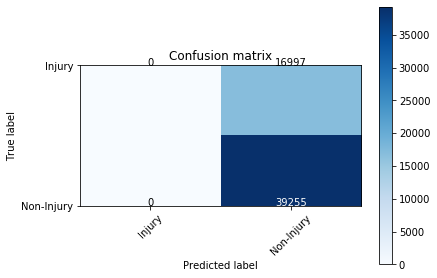

In [81]:
# Compute confusion matrix from the logistic regression comparison
cnf_matrix = confusion_matrix(y_testset, yhat, labels=[1,0])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix for the injury and non-injury datasets.
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury','Non-Injury'],normalize= False,  title='Confusion matrix')

In [82]:
# Test n_neighbor values for the KNN analysis; save them to the train and test empty sets. 
train, test = [],[]
for k in range (1,11):
#Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_trainset,y_trainset)
    yhat = neigh.predict(X_testset)
    train.append(metrics.accuracy_score(y_trainset, neigh.predict(X_trainset)))
    test.append(metrics.accuracy_score(y_testset, yhat))

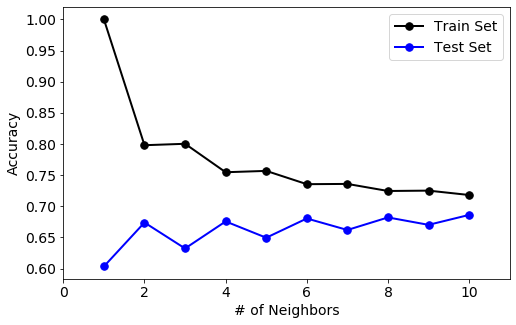

In [83]:
# Plot the results of the previous values to compare the accuracy of the train and test sets
xl = np.linspace(1,10,10)

fig = plt.figure(2, figsize=(8,5))
plt.plot(xl,train,'-k.', ms=15, linewidth = 2, label = 'Train Set')
plt.plot(xl,test,'-b.', ms = 15,linewidth = 2,label = 'Test Set')
plt.ylabel('Accuracy', fontsize =14)
plt.xlabel('# of Neighbors', fontsize = 14)
plt.yticks(fontsize = 14); plt.xticks(fontsize = 14); plt.xlim([0,11])
plt.legend(fontsize = 14)

In [84]:
# Selected K =2 for the neighbor set and the accuracy is below, the results come out the same as the logistic regression with the accuracy only at about 70%, similar to the accuracy of the logistic regression and the split between non-injury and injury sets.
neigh = KNeighborsClassifier(n_neighbors = 2).fit(X_trainset,y_trainset)
yhat = neigh.predict(X_testset)
print("Train set Accuracy: ", metrics.accuracy_score(y_trainset, neigh.predict(X_trainset)))
print("Test set Accuracy: ", metrics.accuracy_score(y_testset, yhat))


Train set Accuracy:  0.7979535549934477
Test set Accuracy:  0.6738427078148332
